# 11A_AugModelsTuned (Stage 2 Model Development 100 Epochs)

Written by: Rupesh Kumar Dey

Dataset: Dataset Set 5 

Notebook used for model development and testing for AugModels (100 Epochs)

## Importing required Libraries

In [1]:
!pip install tensorflow_hub
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 KB 19.0 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 KB 14.5 MB/s eta 0:00:00
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [2]:
# Importing python Libraries
# General / plotting libraries
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Image Libraries
from PIL import Image

# File System Libraries
import os
import sys
import copy
from copy import deepcopy

# Tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics, callbacks
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from HelperFunctions import *

KeyboardInterrupt: 

In [ ]:
# Setting project parent directory path 
projectPath = "/notebooks"

## Model Development - AugModels (100 epochs)

#### Dataset Loading 

### 11A_BaseModel1_CLAHE: Base Model 1

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (100,100))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [5]:
# Create and Train Model and train
BaseModel1_CLAHE = createBaseModel(optimizer = tf.keras.optimizers.SGD())
BaseModel1_CLAHE.summary()
checkpointPath = "TrainedResultsAugTuned/11A_BaseModel1_CLAHE/checkpoint/11A_BaseModel1_CLAHE.ckpt"
BaseModel1_CLAHE_history = trainModel(BaseModel1_CLAHE, train_data, valid_data, checkpointPath ,epochs = 100)

2022-08-28 06:57:50.284455: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 06:57:50.326952: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 06:57:50.327360: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 06:57:50.329411: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 06:57:50.329757: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 100, 100, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 8)       224       
                                                                 
 batch_normalization (BatchN  (None, 100, 100, 8)      32        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100, 100, 8)       0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 99, 99, 16)        1168  

2022-08-28 06:57:53.435014: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


525/525 [==============================] - ETA: 0s - loss: 1.7267 - accuracy: 0.8977 - recall: 0.8924
Epoch 00001: val_accuracy improved from -inf to 0.87326, saving model to TrainedResultsAugTuned/11A_BaseModel1_CLAHE/checkpoint/11A_BaseModel1_CLAHE.ckpt
525/525 [==============================] - 148s 277ms/step - loss: 1.7267 - accuracy: 0.8977 - recall: 0.8924 - val_loss: 0.2600 - val_accuracy: 0.8733 - val_recall: 0.8715
Epoch 2/100
525/525 [==============================] - ETA: 0s - loss: 0.0617 - accuracy: 0.9777 - recall: 0.9771
Epoch 00002: val_accuracy did not improve from 0.87326
525/525 [==============================] - 83s 158ms/step - loss: 0.0617 - accuracy: 0.9777 - recall: 0.9771 - val_loss: 0.2839 - val_accuracy: 0.8646 - val_recall: 0.8646
Epoch 3/100
525/525 [==============================] - ETA: 0s - loss: 0.0253 - accuracy: 0.9933 - recall: 0.9930
Epoch 00003: val_accuracy improved from 0.87326 to 0.88194, saving model to TrainedResultsAugTuned/11A_BaseModel1_CL

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 5s 7ms/step
Confusion Matrix:


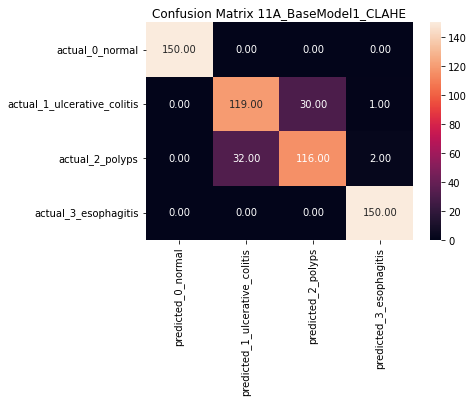

In [6]:
# Load best model from checkpoint folder and generate results. 
BaseModel1_CLAHE = createBaseModel(optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResultsAugTuned/11A_BaseModel1_CLAHE/checkpoint/11A_BaseModel1_CLAHE.ckpt"
loadModel(BaseModel1_CLAHE,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel1_CLAHE, test_data, "11A_BaseModel1_CLAHE" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAugTuned/11A_BaseModel1_CLAHE/results/confusionMatrix/11A_BaseModel1_CLAHE.jpg")

2022-08-28 09:24:43.873719: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://c2850ef1-b8a6-4230-800a-f8a11ae14dc5/assets


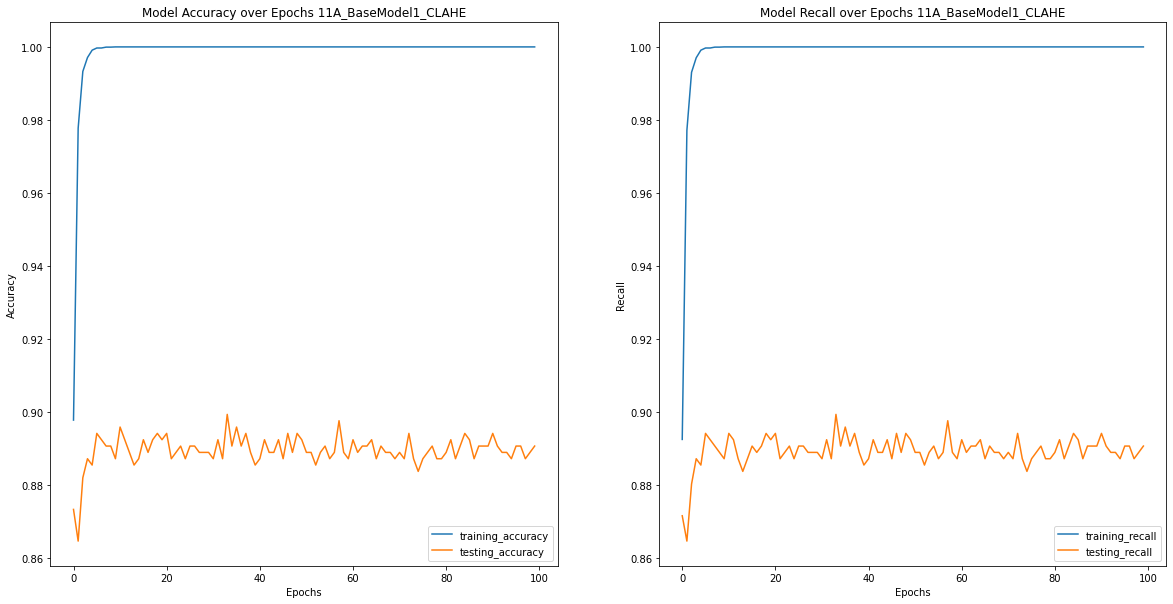

In [7]:
# Save results
saveResults_csv(df_results,"TrainedResultsAugTuned/11A_BaseModel1_CLAHE/results/classificationReport/11A_BaseModel1_CLAHE.csv")
historyPath = "TrainedResultsAugTuned/11A_BaseModel1_CLAHE/history/11A_BaseModel1_CLAHE.npy"
save_history1(BaseModel1_CLAHE_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11A_BaseModel1_CLAHE", location = "TrainedResultsAugTuned/11A_BaseModel1_CLAHE/history/11A_BaseModel1_CLAHE.jpg")

### 11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler: Base Model 2 (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [5]:
# Create and Train Model and train
BaseModel2_MULTISCALE_tunedAdamLrScheduler = createBaseModel2(optimizer = tf.keras.optimizers.Adam())
BaseModel2_MULTISCALE_tunedAdamLrScheduler.summary()
checkpointPath = "TrainedResultsAugTuned/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler/checkpoint/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler.ckpt"
BaseModel2_MULTISCALE_tunedAdamLrScheduler_history = trainModelLrScheduler(BaseModel2_MULTISCALE_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 100, epochCutOff = 25, reductionRatio = 2)

2022-08-28 10:20:40.155813: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 10:20:40.202292: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 10:20:40.202797: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 10:20:40.204980: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 10:20:40.205422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 112, 112, 32)      2432      
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 112, 112, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 16)        12816 

2022-08-28 10:20:45.796850: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


525/525 [==============================] - ETA: 0s - loss: 0.1959 - accuracy: 0.9287 - recall: 0.9196
Epoch 00001: val_accuracy improved from -inf to 0.86806, saving model to TrainedResultsAugTuned/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler/checkpoint/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler.ckpt
525/525 [==============================] - 166s 307ms/step - loss: 0.1959 - accuracy: 0.9287 - recall: 0.9196 - val_loss: 0.3352 - val_accuracy: 0.8681 - val_recall: 0.8663 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
525/525 [==============================] - ETA: 0s - loss: 0.0740 - accuracy: 0.9740 - recall: 0.9730
Epoch 00002: val_accuracy did not improve from 0.86806
525/525 [==============================] - 99s 188ms/step - loss: 0.0740 - accuracy: 0.9740 - recall: 0.9730 - val_loss: 0.3812 - val_accuracy: 0.8455 - val_recall: 0.8438 - lr: 0.0010

Epoch 00003: LearningRateScheduler setting learning rate to 0.00100

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 5s 9ms/step
Confusion Matrix:


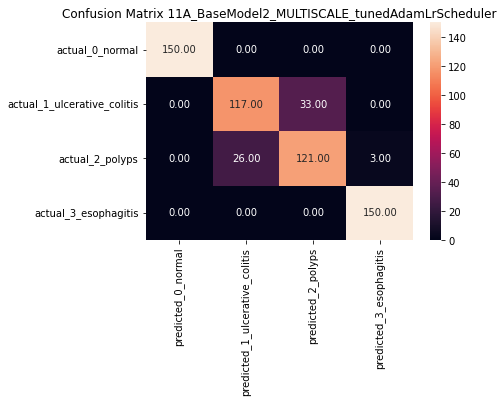

In [6]:
# Load best model from checkpoint folder and generate results. 
BaseModel2_MULTISCALE_tunedAdamLrScheduler = createBaseModel2(optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAugTuned/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler/checkpoint/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler.ckpt"
loadModel(BaseModel2_MULTISCALE_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(BaseModel2_MULTISCALE_tunedAdamLrScheduler, test_data, "11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAugTuned/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler/results/confusionMatrix/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler.jpg")

2022-08-28 13:16:25.693026: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://63ea8ccf-f93c-4534-80ad-4ff04b7ba6e7/assets
DONE


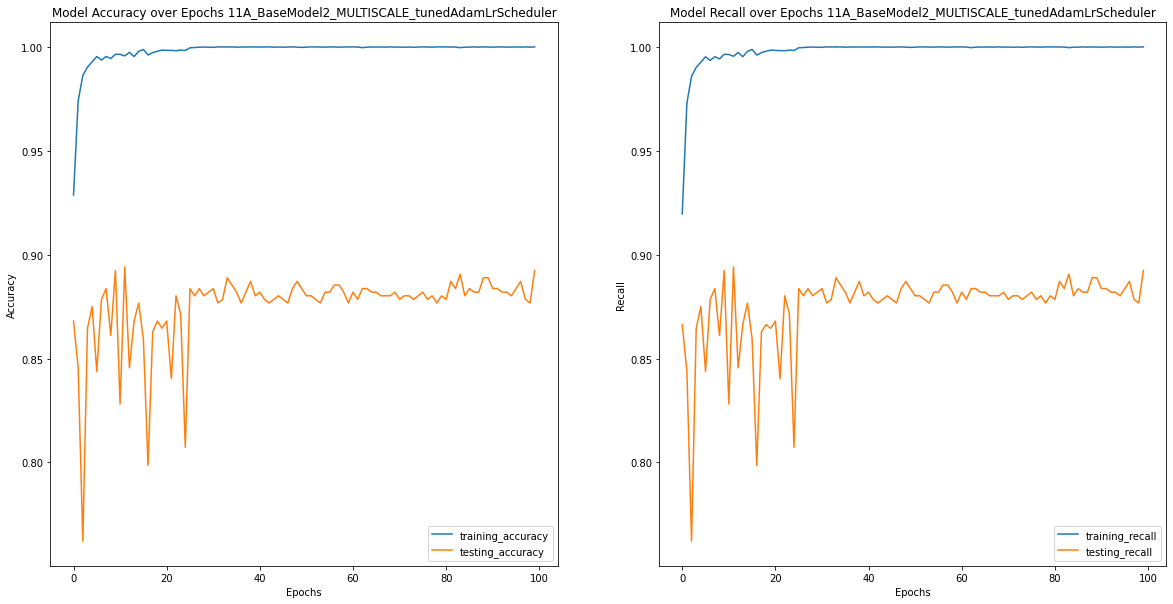

In [7]:
# Save results
saveResults_csv(df_results,"TrainedResultsAugTuned/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler/results/classificationReport/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler.csv")
historyPath = "TrainedResultsAugTuned/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler/history/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler.npy"
save_history1(BaseModel2_MULTISCALE_tunedAdamLrScheduler_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler", location = "TrainedResultsAugTuned/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler/history/11A_BaseModel2_MULTISCALE_tunedAdamLrScheduler.jpg")
print("DONE")

### 11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdam: Transfer Learning with ResNet50V1 (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [8]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [9]:
# Create Res Net 50 V1 and train
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.summary()
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.ckpt"
TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler_history = trainModelLrScheduler(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 100)

102981632/102967424 [==============================] - 2s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 batch_normalization_14 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_15 (Bat  (None, 1000)             4000      
 chNormalization)                                                
                                                          

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 9s 14ms/step
Confusion Matrix:


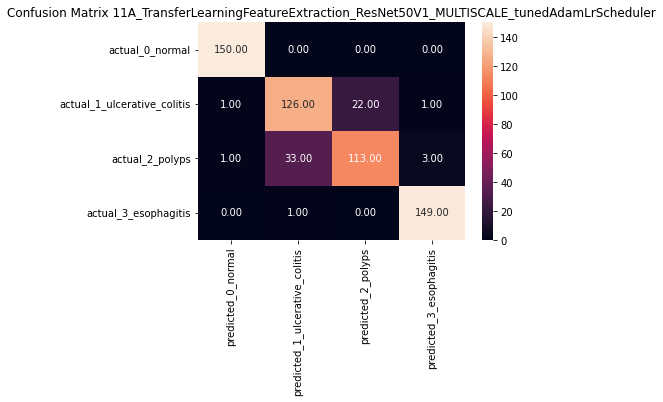

In [10]:
# Load best model from checkpoint folder and generate results. 
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler, test_data, "11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/results/confusionMatrix/11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://c639e736-6357-46df-8512-49e4dc8de678/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


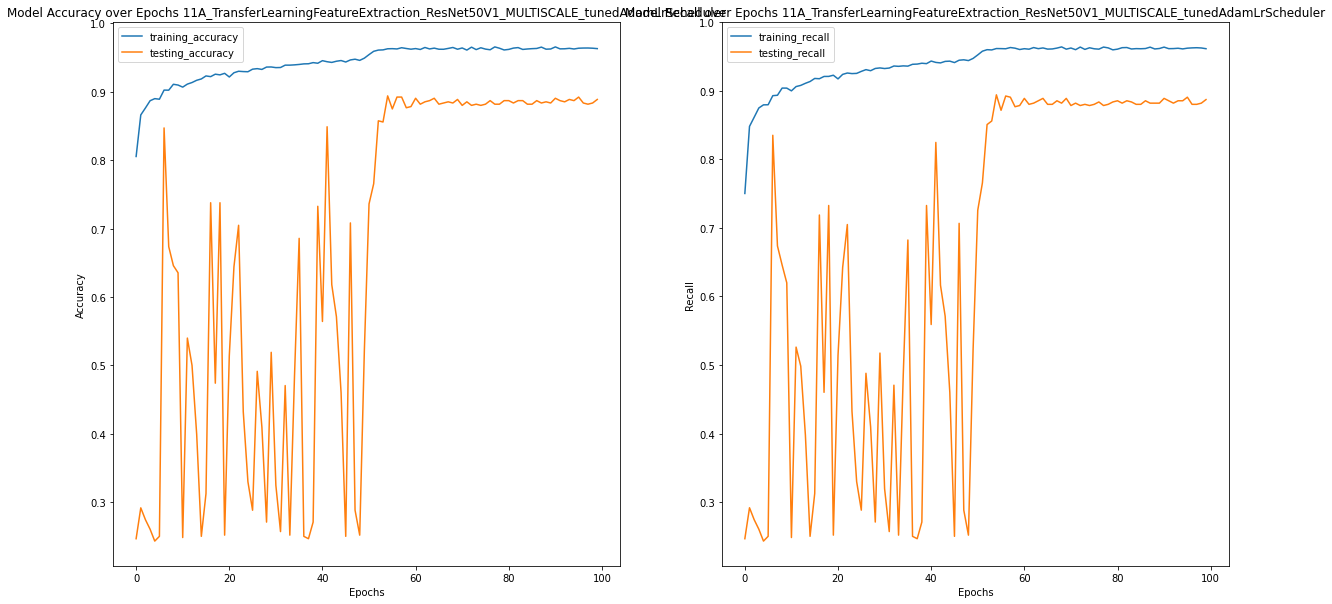

In [11]:
# Save results
saveResults_csv(df_results,"TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/results/classificationReport/11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.csv")
historyPath = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/history/11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.npy"
save_history1(TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler_history, historyPath)
history = history = load_history(historyPath)
plot_history(history, "11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler", location = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler/history/11A_TransferLearningFeatureExtraction_ResNet50V1_MULTISCALE_tunedAdamLrScheduler.jpg")

### 11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdam: Transfer Learning with ResNet50V2 (Optimizer - Adam + LrScheduler)

In [4]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [5]:
# Create Res Net 50 V2 and train
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.summary()
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.ckpt"
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler_history = trainModelLrScheduler(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 100)

2022-08-28 17:14:25.796414: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 17:14:25.845443: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 17:14:25.845872: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 17:14:25.848235: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 17:14:25.848620: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

102883328/102869336 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 1000)              25613800  
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                            

2022-08-28 17:14:37.559741: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


525/525 [==============================] - ETA: 0s - loss: 0.5831 - accuracy: 0.7771 - recall: 0.7261
Epoch 00001: val_accuracy improved from -inf to 0.78125, saving model to TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.ckpt
525/525 [==============================] - 175s 321ms/step - loss: 0.5831 - accuracy: 0.7771 - recall: 0.7261 - val_loss: 0.6093 - val_accuracy: 0.7812 - val_recall: 0.7118 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
525/525 [==============================] - ETA: 0s - loss: 0.4193 - accuracy: 0.8394 - recall: 0.8105
Epoch 00002: val_accuracy did not improve from 0.78125
525/525 [==============================] - 107s 203ms/step - loss: 0.4193 - accuracy: 0.8394 - recall: 0.8105 - val_loss: 0.7005 - val_accuracy: 0.7726 - val_recall: 0.7292 - lr: 0.0010

Epoch 

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 9s 14ms/step
Confusion Matrix:


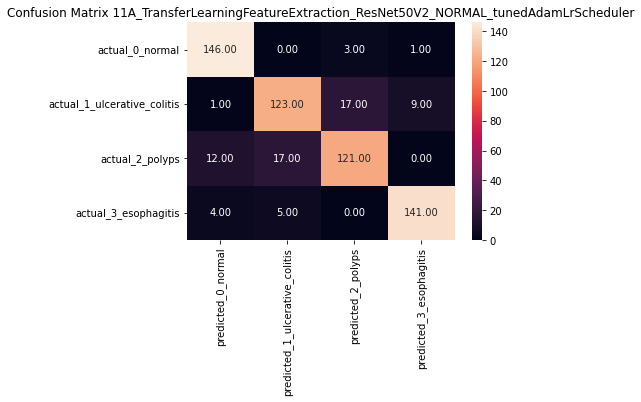

In [6]:
# load best model and generate results. 
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler, test_data, "11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/results/confusionMatrix/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.jpg")

2022-08-28 20:29:12.786804: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://ceab403c-ec34-43bd-b9f2-1091c074230b/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


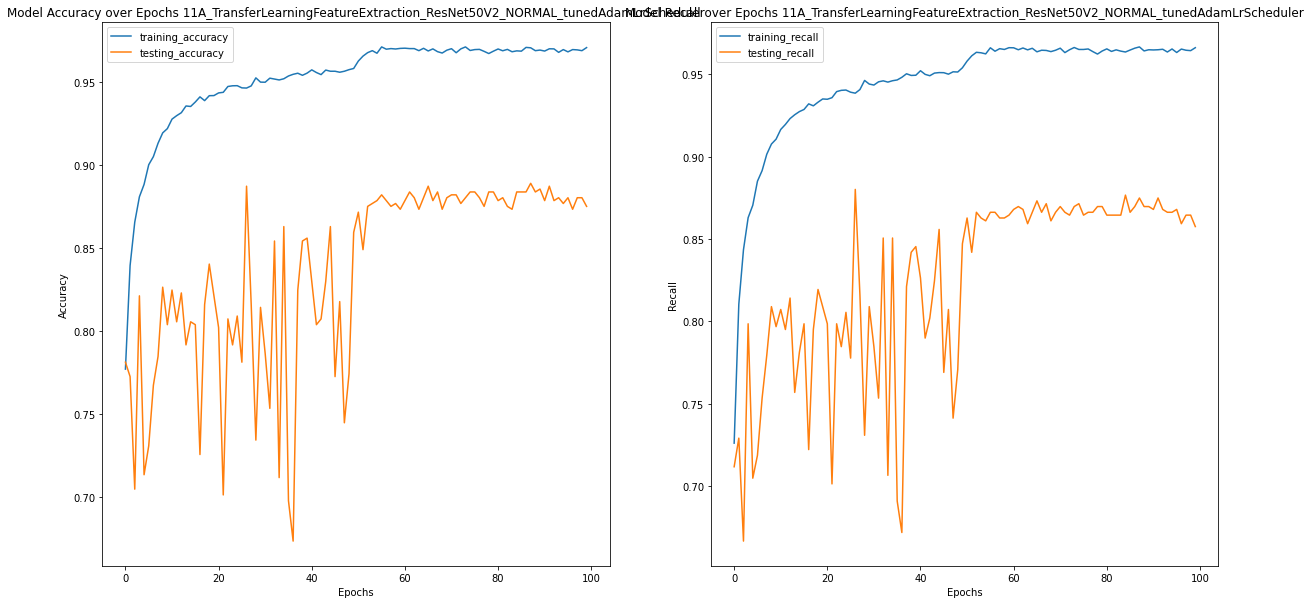

In [7]:
# Save results
saveResults_csv(df_results,"TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/results/classificationReport/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.csv")
historyPath = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/history/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.npy"
save_history1(TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler_history, historyPath)
history = history = load_history(historyPath)
plot_history(history, "11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler", location = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler/history/11A_TransferLearningFeatureExtraction_ResNet50V2_NORMAL_tunedAdamLrScheduler.jpg")

### 11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [5]:
# Create MobileNetV1 and train
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.summary()
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.ckpt"
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler_history = trainModelLrScheduler(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 100)

2022-08-29 00:15:00.107389: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 00:15:00.187071: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 00:15:00.187496: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 00:15:00.189301: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 00:15:00.189660: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

17235968/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                              

2022-08-29 00:15:07.195856: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


525/525 [==============================] - ETA: 0s - loss: 0.4424 - accuracy: 0.8324 - recall: 0.8039
Epoch 00001: val_accuracy improved from -inf to 0.67535, saving model to TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.ckpt
525/525 [==============================] - 178s 330ms/step - loss: 0.4424 - accuracy: 0.8324 - recall: 0.8039 - val_loss: 0.7627 - val_accuracy: 0.6753 - val_recall: 0.6372 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
525/525 [==============================] - ETA: 0s - loss: 0.2724 - accuracy: 0.8999 - recall: 0.8889
Epoch 00002: val_accuracy improved from 0.67535 to 0.85243, saving model to TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_t

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 6s 10ms/step
Confusion Matrix:


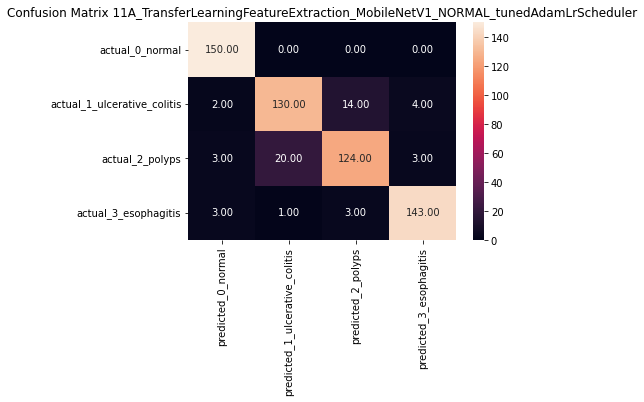

In [6]:
# Load best model and generate results. 
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler, test_data, "11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/confusionMatrix/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.jpg")

2022-08-29 03:09:43.218042: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://c56d9b49-bf12-4572-89fb-0567bc550495/assets


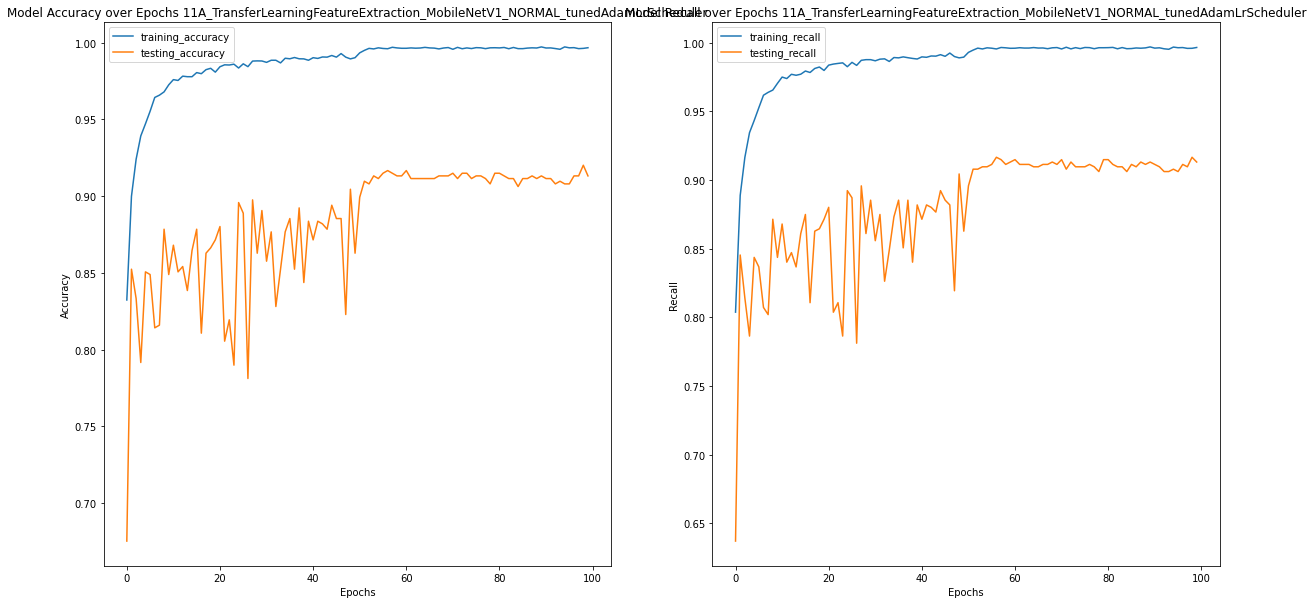

In [7]:
# Save results
saveResults_csv(df_results,"TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/results/classificationReport/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.csv")
historyPath = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/history/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.npy"
save_history1(TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler_history, historyPath)
history = history = load_history(historyPath)
plot_history(history, "11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler", location = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler/history/11A_TransferLearningFeatureExtraction_MobileNetV1_NORMAL_tunedAdamLrScheduler.jpg")

### 11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE: Transfer Learning with MobileNetV2 model (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [5]:
# Create MobileNetV2 and train
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.summary()
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.ckpt"
TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler_history = trainModelLrScheduler(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 100)

2022-08-29 04:03:31.267032: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 04:03:31.517192: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 04:03:31.517619: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 04:03:31.519190: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 04:03:31.519570: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

14548992/14536120 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1000)             3538984   
 ional)                                                          
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                              

2022-08-29 04:03:43.655934: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


525/525 [==============================] - ETA: 0s - loss: 0.3415 - accuracy: 0.8764 - recall: 0.8549
Epoch 00001: val_accuracy improved from -inf to 0.55382, saving model to TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.ckpt
525/525 [==============================] - 159s 287ms/step - loss: 0.3415 - accuracy: 0.8764 - recall: 0.8549 - val_loss: 1.2433 - val_accuracy: 0.5538 - val_recall: 0.5330 - lr: 0.0010

Epoch 00002: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/100
525/525 [==============================] - ETA: 0s - loss: 0.1829 - accuracy: 0.9337 - recall: 0.9273
Epoch 00002: val_accuracy improved from 0.55382 to 0.79514, saving model to TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tuned

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 7s 11ms/step
Confusion Matrix:


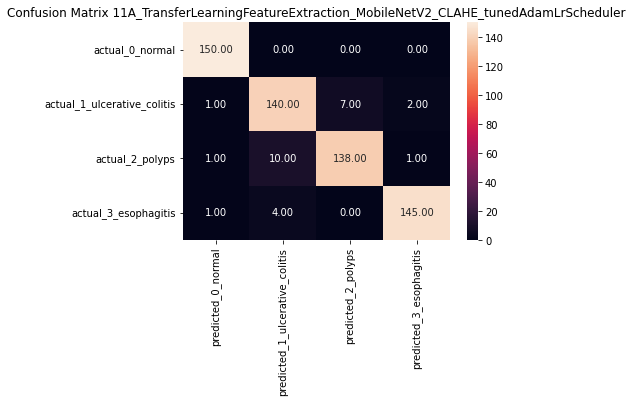

In [6]:
# Load best model from checkpoint folder and generate results.
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler = createApplicationsFeatureExtractionModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.ckpt"

loadModel(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler, test_data, "11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/results/confusionMatrix/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.jpg")




2022-08-29 06:48:31.629979: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://fc86670a-484e-4576-9fb0-32bf019c3bcc/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


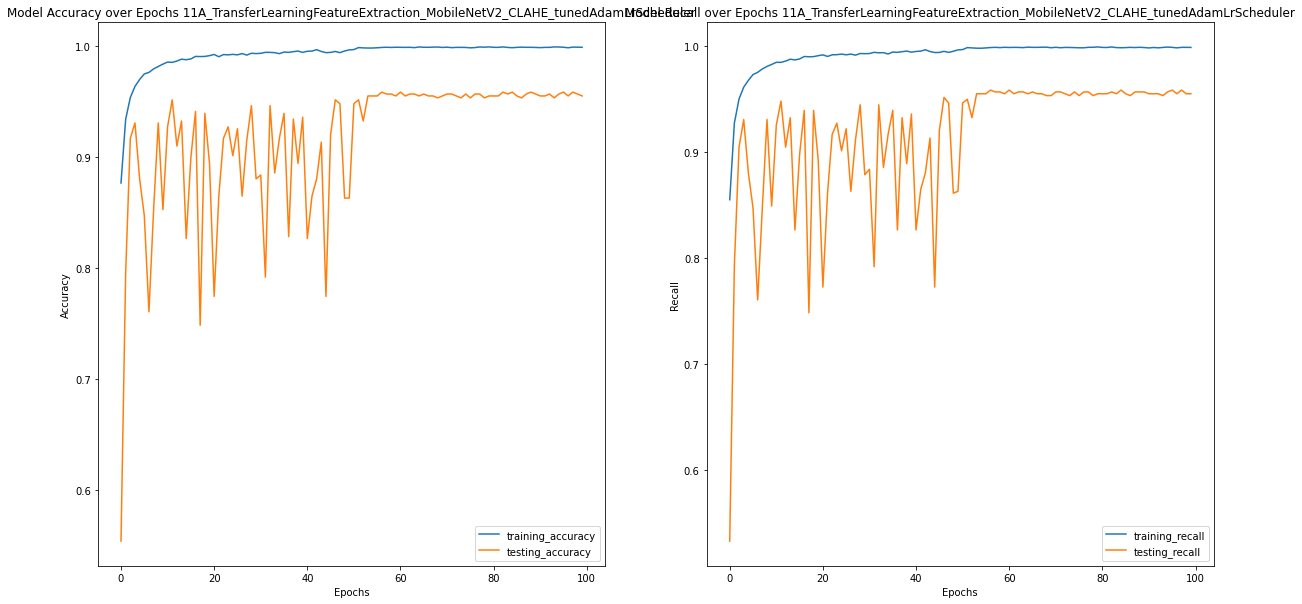

In [7]:
# Save results
saveResults_csv(df_results,"TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/results/classificationReport/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.csv")
historyPath = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/history/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.npy"
save_history1(TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler", location = "TrainedResultsAugTuned/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler/history/11A_TransferLearningFeatureExtraction_MobileNetV2_CLAHE_tunedAdamLrScheduler.jpg")

### 11A_TransferLearningFineTuning_ResNet50V1_CLAHE: Transfer Learning with ResNet50V1 model (Optimizer - Adam + LrScheduler)

#### Dataset Loading 

In [8]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [9]:
# Create Res Net 50 V1 and train model 
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.summary()
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.ckpt"
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler_history = trainModelLrScheduler(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler, train_data, valid_data, checkpointPath ,epochs = 100)

102981632/102967424 [==============================] - 1s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 batch_normalization_6 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_7 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                          

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 8s 12ms/step
Confusion Matrix:


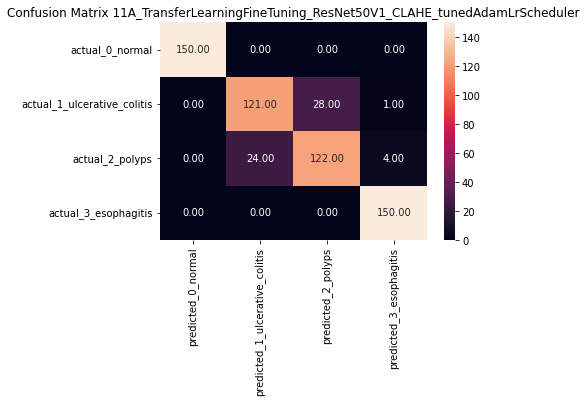

In [10]:
# Load best model from checkpoint folder and generate results.
baseModel = tf.keras.applications.resnet50.ResNet50(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler = createApplicationsFineTuningModel(baseModel, trainable = True, numLayersUnfreeze = 34 ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.Adam())
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/checkpoint/11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler, test_data, "11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/results/confusionMatrix/11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.jpg")

INFO:tensorflow:Assets written to: ram://32ba6b16-679c-4c99-afdc-f351fddd5dae/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


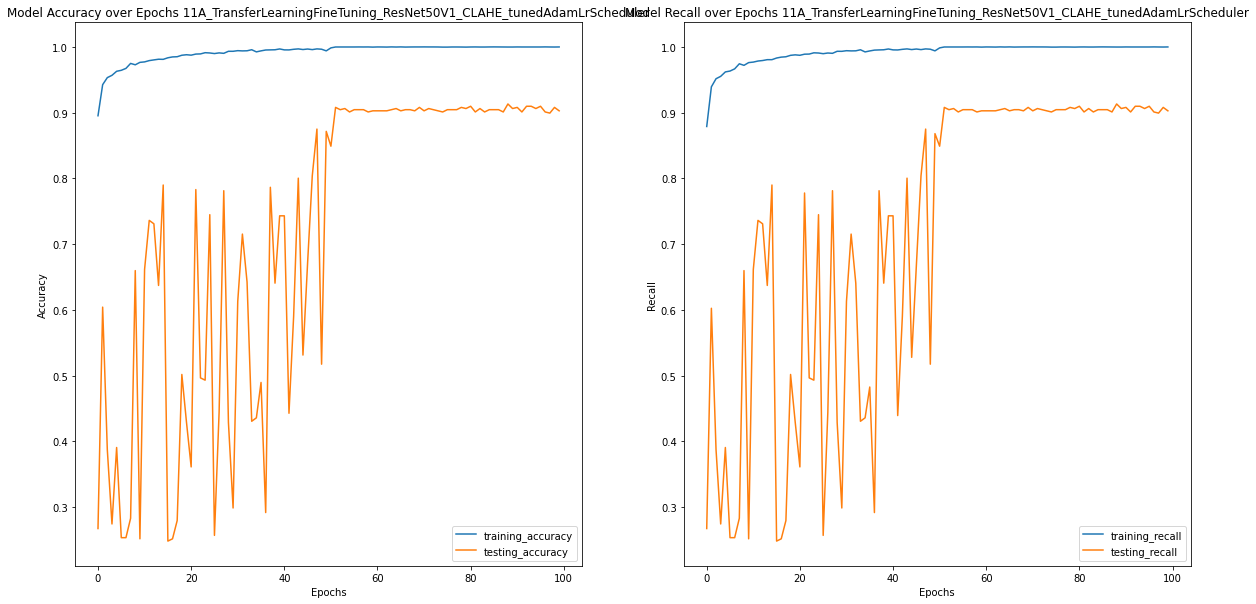

In [11]:
# Save results
saveResults_csv(df_results,"TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/results/classificationReport/11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.csv")
historyPath = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/history/11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.npy"
save_history1(TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler", location = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler/history/11A_TransferLearningFineTuning_ResNet50V1_CLAHE_tunedAdamLrScheduler.jpg")

### 11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH: Transfer Learning with ResNet50V2 model

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [5]:
# Create Res Net 50 V2 and train model 
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V2_RAYLEIGH = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
TransferLearningFineTuning_ResNet50V2_RAYLEIGH.summary()
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/checkpoint/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.ckpt"
TransferLearningFineTuning_ResNet50V2_RAYLEIGH_history = trainModel(TransferLearningFineTuning_ResNet50V2_RAYLEIGH, train_data, valid_data, checkpointPath ,epochs = 100)

2022-08-29 10:38:34.894957: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 10:38:34.943448: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 10:38:34.943899: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 10:38:34.945600: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 10:38:34.945964: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

102883328/102869336 [==============================] - 2s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 1000)              25613800  
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                            

2022-08-29 10:38:45.298801: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


525/525 [==============================] - ETA: 0s - loss: 0.7376 - accuracy: 0.7101 - recall: 0.6252
Epoch 00001: val_accuracy improved from -inf to 0.70139, saving model to TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/checkpoint/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.ckpt
525/525 [==============================] - 166s 305ms/step - loss: 0.7376 - accuracy: 0.7101 - recall: 0.6252 - val_loss: 0.7432 - val_accuracy: 0.7014 - val_recall: 0.5781
Epoch 2/100
525/525 [==============================] - ETA: 0s - loss: 0.5541 - accuracy: 0.7851 - recall: 0.7346
Epoch 00002: val_accuracy improved from 0.70139 to 0.76215, saving model to TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/checkpoint/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.ckpt
525/525 [==============================] - 101s 192ms/step - loss: 0.5541 - accuracy: 0.7851 - recall: 0.7346 - val_loss: 0.7037 - val_accuracy: 0.7622 - val_recall: 0.7083
Epoch 3

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 10s 14ms/step
Confusion Matrix:


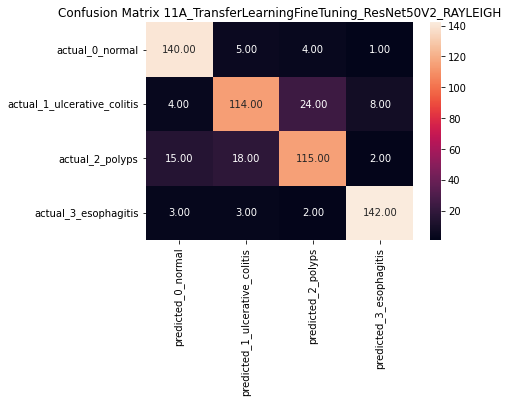

In [6]:
# Load best model from checkpoint folder and generate results. 
baseModel = tf.keras.applications.resnet_v2.ResNet50V2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_ResNet50V2_RAYLEIGH = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/checkpoint/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.ckpt"
loadModel(TransferLearningFineTuning_ResNet50V2_RAYLEIGH,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_ResNet50V2_RAYLEIGH, test_data, "11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/results/confusionMatrix/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.jpg")

2022-08-29 13:40:34.374956: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://61783ec8-6376-48af-9d0c-0939232e6e30/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


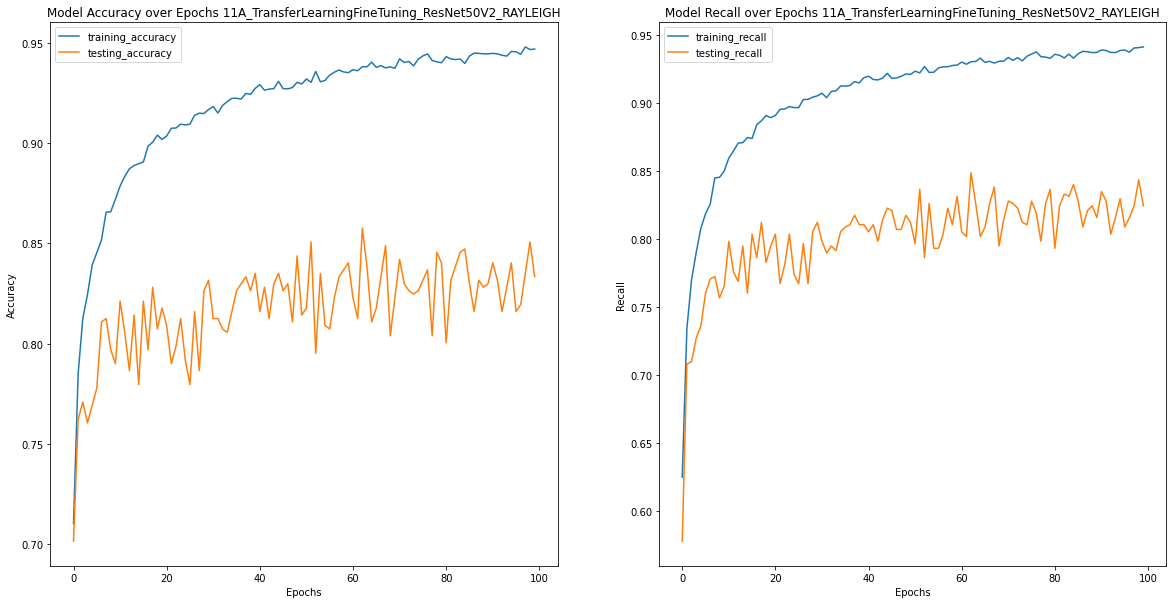

In [7]:
# Save results
saveResults_csv(df_results,"TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/results/classificationReport/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.csv")
historyPath = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/history/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.npy"
save_history1(TransferLearningFineTuning_ResNet50V2_RAYLEIGH_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH", location = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH/history/11A_TransferLearningFineTuning_ResNet50V2_RAYLEIGH.jpg")

### 11A_TransferLearningFineTuning_MobileNetV1_NORMAL: Transfer Learning with MobileNetV1 model

#### Dataset Loading 

In [4]:
# Defining path of dataset
train_path = "/DatasetAug/train"
test_path = "/DatasetAug/val"
# Create dataset using Model Helper Function (datagen_flow)
train_data, valid_data, test_data = datagen_flow(projectPath, train_path, test_path,image_size = (224,224))

Found 16800 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Found 600 images belonging to 4 classes.


#### Model Development and Training

In [5]:
# Create MobileNetV1 and train model 
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV1_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
TransferLearningFineTuning_MobileNetV1_NORMAL.summary()
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV1_NORMAL/checkpoint/11A_TransferLearningFineTuning_MobileNetV1_NORMAL.ckpt"
TransferLearningFineTuning_MobileNetV1_NORMAL_history = trainModel(TransferLearningFineTuning_MobileNetV1_NORMAL, train_data, valid_data, checkpointPath ,epochs = 100)

2022-08-29 16:39:05.068206: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 16:39:05.203538: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 16:39:05.203965: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 16:39:05.205878: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-29 16:39:05.206233: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1052] successful NUMA node read f

17235968/17225924 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1000)             4253864   
 nal)                                                            
                                                                 
 batch_normalization (BatchN  (None, 1000)             4000      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 batch_normalization_1 (Batc  (None, 1000)             4000      
 hNormalization)                                              

2022-08-29 16:39:13.790848: I tensorflow/stream_executor/cuda/cuda_dnn.cc:377] Loaded cuDNN version 8302


525/525 [==============================] - ETA: 0s - loss: 0.6134 - accuracy: 0.7622 - recall: 0.7039
Epoch 00001: val_accuracy improved from -inf to 0.75174, saving model to TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV1_NORMAL/checkpoint/11A_TransferLearningFineTuning_MobileNetV1_NORMAL.ckpt
525/525 [==============================] - 165s 308ms/step - loss: 0.6134 - accuracy: 0.7622 - recall: 0.7039 - val_loss: 0.6684 - val_accuracy: 0.7517 - val_recall: 0.6649
Epoch 2/100
525/525 [==============================] - ETA: 0s - loss: 0.4123 - accuracy: 0.8443 - recall: 0.8168
Epoch 00002: val_accuracy improved from 0.75174 to 0.82465, saving model to TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV1_NORMAL/checkpoint/11A_TransferLearningFineTuning_MobileNetV1_NORMAL.ckpt
525/525 [==============================] - 90s 172ms/step - loss: 0.4123 - accuracy: 0.8443 - recall: 0.8168 - val_loss: 0.5055 - val_accuracy: 0.8247 - val_recall: 0.7969
Epoch 3/100


#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 6s 8ms/step
Confusion Matrix:


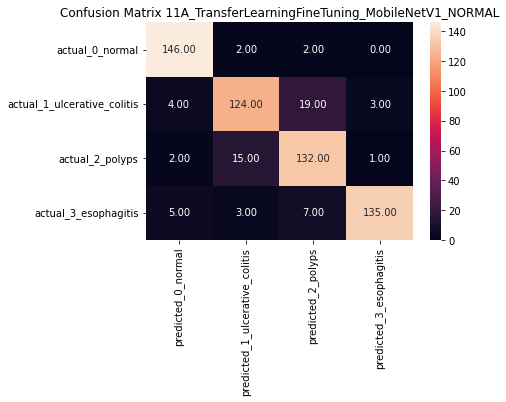

In [6]:
# Load best model from checkpoint folder and generate results. 
baseModel = tf.keras.applications.mobilenet.MobileNet(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV1_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV1_NORMAL/checkpoint/11A_TransferLearningFineTuning_MobileNetV1_NORMAL.ckpt"
loadModel(TransferLearningFineTuning_MobileNetV1_NORMAL,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_MobileNetV1_NORMAL, test_data, "11A_TransferLearningFineTuning_MobileNetV1_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV1_NORMAL/results/confusionMatrix/11A_TransferLearningFineTuning_MobileNetV1_NORMAL.jpg")

2022-08-29 19:22:54.114962: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://5e15512b-97ff-47b9-b347-33c78002b1b6/assets


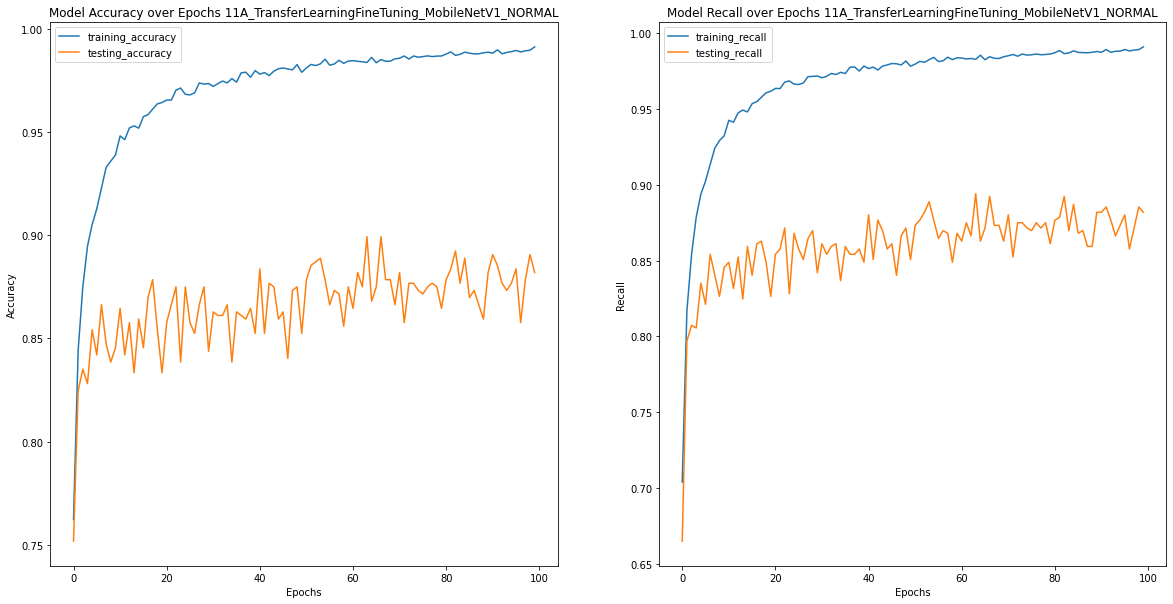

In [7]:
# Save results
saveResults_csv(df_results,"TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV1_NORMAL/results/classificationReport/11A_TransferLearningFineTuning_MobileNetV1_NORMAL.csv")
historyPath = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV1_NORMAL/history/11A_TransferLearningFineTuning_MobileNetV1_NORMAL.npy"
save_history1(TransferLearningFineTuning_MobileNetV1_NORMAL_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11A_TransferLearningFineTuning_MobileNetV1_NORMAL", location = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV1_NORMAL/history/11A_TransferLearningFineTuning_MobileNetV1_NORMAL.jpg")

### 11A_TransferLearningFineTuning_MobileNetV2_NORMAL: Transfer Learning with MobileNetV2 model

#### Model Development and Training

In [8]:
# Create MobileNetV2  and train model 
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV2_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
TransferLearningFineTuning_MobileNetV2_NORMAL.summary()
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV2_NORMAL/checkpoint/11A_TransferLearningFineTuning_MobileNetV2_NORMAL.ckpt"
TransferLearningFineTuning_MobileNetV2_NORMAL_history = trainModel(TransferLearningFineTuning_MobileNetV2_NORMAL, train_data, valid_data, checkpointPath ,epochs = 100)

14548992/14536120 [==============================] - 0s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, 1000)             3538984   
 ional)                                                          
                                                                 
 batch_normalization_6 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 1000)              1001000   
                                                                 
 batch_normalization_7 (Batc  (None, 1000)             4000      
 hNormalization)                                            

#### Loading Checkpoint & Prediction & Results

600/600 [==============================] - 7s 10ms/step
Confusion Matrix:


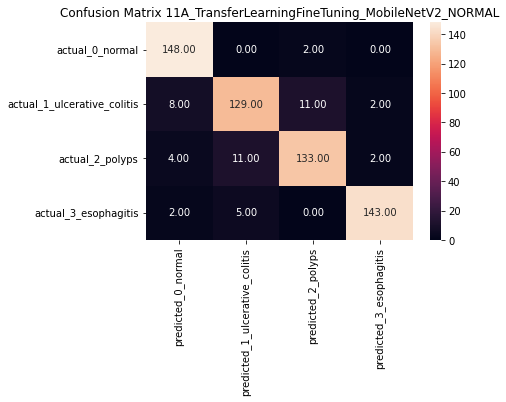

In [9]:
# Load best model from checkpoint folder and generate results. 
baseModel = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = True, weights = "imagenet")
TransferLearningFineTuning_MobileNetV2_NORMAL = createApplicationsFineTuningModel(baseModel, trainable = False ,num_classes = 4, IMAGE_SHAPE = (224,224,3), optimizer = tf.keras.optimizers.SGD())
checkpointPath = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV2_NORMAL/checkpoint/11A_TransferLearningFineTuning_MobileNetV2_NORMAL.ckpt"
loadModel(TransferLearningFineTuning_MobileNetV2_NORMAL,checkpointPath)
df_results, confusion_matrix, y_true, predictions = testResults(TransferLearningFineTuning_MobileNetV2_NORMAL, test_data, "11A_TransferLearningFineTuning_MobileNetV2_NORMAL" ,
                                                                data_class = ["0_normal",
                                                                              "1_ulcerative_colitis",
                                                                              "2_polyps",
                                                                              "3_esophagitis"],
                                                                location = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV2_NORMAL/results/confusionMatrix/11A_TransferLearningFineTuning_MobileNetV2_NORMAL.jpg")

INFO:tensorflow:Assets written to: ram://08eb4941-a6c2-40d8-942c-d4ec8063a029/assets


/usr/local/lib/python3.8/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)
/usr/local/lib/python3.8/dist-packages/keras/saving/saved_model/layer_serialization.py:112: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  return generic_utils.serialize_keras_object(obj)


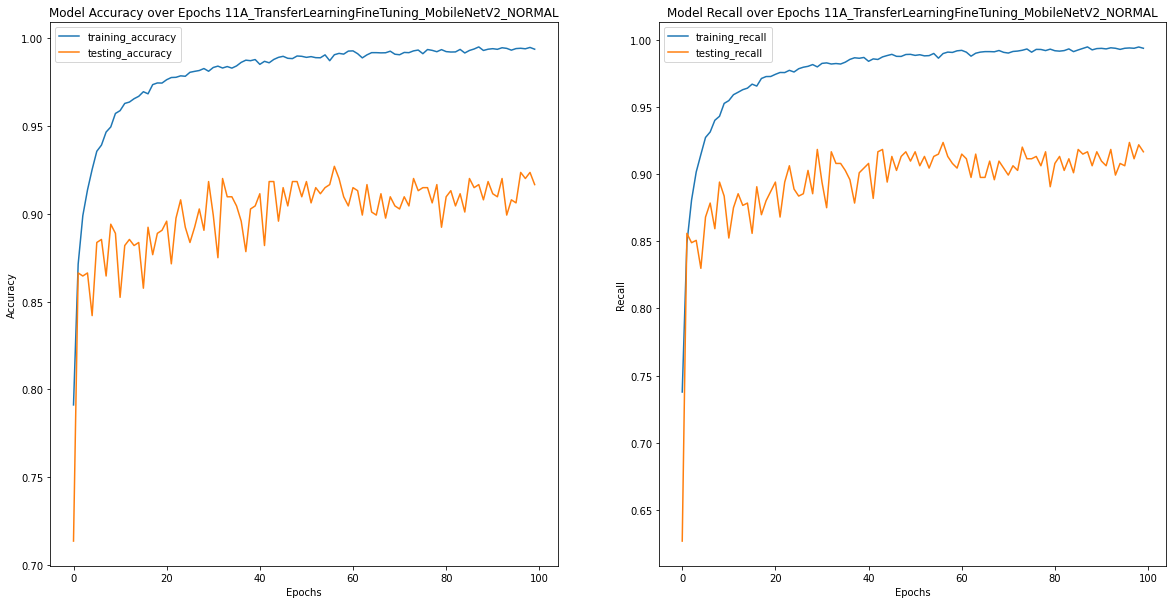

In [10]:
# Save results
saveResults_csv(df_results,"TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV2_NORMAL/results/classificationReport/11A_TransferLearningFineTuning_MobileNetV2_NORMAL.csv")
historyPath = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV2_NORMAL/history/11A_TransferLearningFineTuning_MobileNetV2_NORMAL.npy"
save_history1(TransferLearningFineTuning_MobileNetV2_NORMAL_history, historyPath)
history = load_history(historyPath)
plot_history(history, "11A_TransferLearningFineTuning_MobileNetV2_NORMAL", location = "TrainedResultsAugTuned/11A_TransferLearningFineTuning_MobileNetV2_NORMAL/history/11A_TransferLearningFineTuning_MobileNetV2_NORMAL.jpg")